AR(1)

$\Large a_t = \phi a_{t-1} + \varepsilon_t$

ARMA(1,1)

$\Large a_t = \beta a_{t-1} + \phi \varepsilon_{t-1}+ \varepsilon_t$

ARCH(1)

$\Large a_t = \varepsilon_t \sqrt{\alpha + \alpha_1 a_{t-1}^2}$
$\Large  = \varepsilon_t \sigma_t$

GARCH(1,1)

$\Large a_t = \varepsilon_t \sqrt{\alpha + \alpha_1 a_{t-1}^2 + + \beta_1 \sigma_{t-1}^2}$
$\Large  = \varepsilon_t \sigma_t$

In [235]:
from random import gauss
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
try:
  from arch import arch_model
except:
  !pip install arch
  from arch import arch_model

# ARCH(1) Model

$$
a_t = \varepsilon_t \sqrt{\omega + \alpha_1 a_{t-1}^2}
$$

$$
a_0 \sim \mathcal{N}(0,1)
$$

$$
\varepsilon_t \sim \mathcal{N}(0,1)
$$

In [236]:
# create dataset
n = 1000
omega = 0.5

alpha_1 = 0.15

test_size = int(n*0.3)

series = [gauss(0,1)]
vols = [1]

for _ in range(n):
    new_vol = np.sqrt(omega + alpha_1*series[-1]**2)
    new_val = gauss(0,1) * new_vol
    
    vols.append(new_vol)
    series.append(new_val)

Text(0.5, 1.0, 'Simulated ARCH(1) Data')

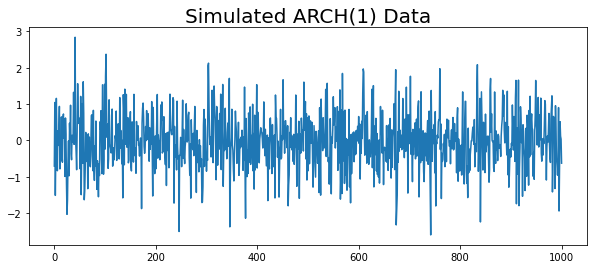

In [237]:
plt.figure(figsize=(10,4))
plt.plot(series)
plt.title('Simulated ARCH(1) Data', fontsize=20)

Text(0.5, 1.0, 'Data Volatility')

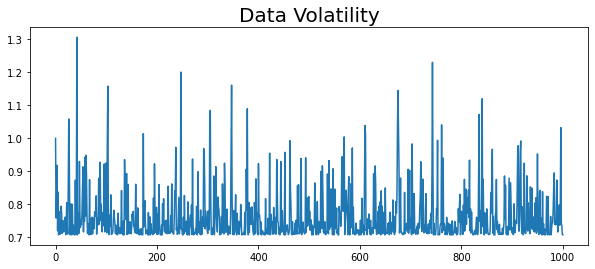

In [238]:
plt.figure(figsize=(10,4))
plt.plot(vols)
plt.title('Data Volatility', fontsize=20)

Text(0.5, 1.0, 'Data and Volatility')

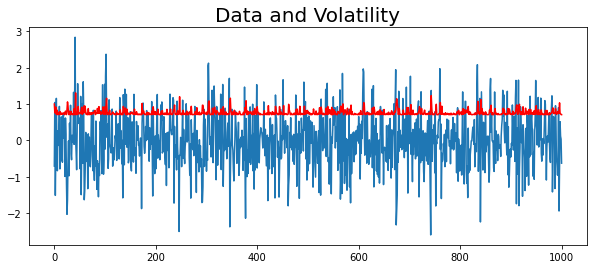

In [239]:
plt.figure(figsize=(10,4))
plt.plot(series)
plt.plot(vols, color='red')
plt.title('Data and Volatility', fontsize=20)

## PACF Plot

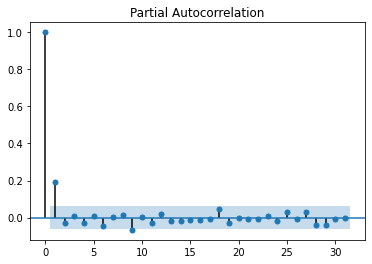

In [240]:
plot_pacf(np.array(series)**2)
plt.show()

## Fit the ARCH Model

In [241]:
train, test = series[:-test_size], series[-test_size:]

In [242]:
model = arch_model(train, p=1, q=0)

In [243]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 826.9348184409741
Iteration:      2,   Func. Count:     14,   Neg. LLF: 800.8319519430194
Iteration:      3,   Func. Count:     22,   Neg. LLF: 794.7091377659247
Iteration:      4,   Func. Count:     28,   Neg. LLF: 793.4755652583626
Iteration:      5,   Func. Count:     35,   Neg. LLF: 792.5470236404736
Iteration:      6,   Func. Count:     40,   Neg. LLF: 792.277091187299
Iteration:      7,   Func. Count:     45,   Neg. LLF: 792.2547897741578
Iteration:      8,   Func. Count:     50,   Neg. LLF: 792.2539690894989
Iteration:      9,   Func. Count:     55,   Neg. LLF: 792.2538452317362
Iteration:     10,   Func. Count:     60,   Neg. LLF: 792.2538324467566
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 792.2538324470347
            Iterations: 10
            Function evaluations: 60
            Gradient evaluations: 10


In [244]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -792.254
Distribution:                  Normal   AIC:                           1590.51
Method:            Maximum Likelihood   BIC:                           1604.17
                                        No. Observations:                  701
Date:                Mon, Mar 15 2021   Df Residuals:                      700
Time:                        12:02:34   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu            -0.0253  2.679e-02     -0.946      0.344 [-7.785e-02,2.717e-02]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.4779  3.327e-02     14.364  8.735e-47   [  0.413,  0.543]
alpha[1]       0.1690  4.820e-02      3.505  4.562e-04 [7.448e-02,  0.263]
==========================================================================

Covariance estimator: robust
"""

## Predict

In [245]:
predictions = model_fit.forecast(horizon=test_size)

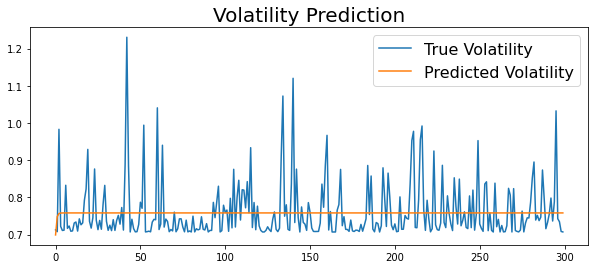

In [246]:
plt.figure(figsize=(10,4))
true, = plt.plot(vols[-test_size:])
preds, = plt.plot(np.sqrt(predictions.variance.values[-1, :]))
plt.title('Volatility Prediction', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)

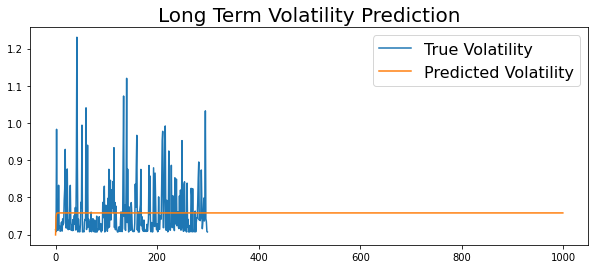

In [247]:
predictions_long_term = model_fit.forecast(horizon=1000)
plt.figure(figsize=(10,4))
true, = plt.plot(vols[-test_size:])
preds, = plt.plot(np.sqrt(predictions_long_term.variance.values[-1, :]))
plt.title('Long Term Volatility Prediction', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)

## Rolling Forecast Origin

In [248]:
rolling_predictions = []
for i in range(test_size):
    train = series[:-(test_size-i)]
    model = arch_model(train, p=1, q=0)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

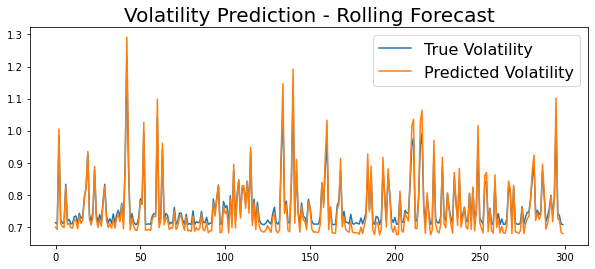

In [249]:
plt.figure(figsize=(10,4))
true, = plt.plot(vols[-test_size:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)

# ARCH(2) Model

$$
a_t = \varepsilon_t \sqrt{\omega + \alpha_1 a_{t-1}^2 + \alpha_2 a_{t-2}^2}
$$

$$
a_0, a_1 \sim \mathcal{N}(0,1)
$$

$$
\varepsilon_t \sim \mathcal{N}(0,1)
$$

In [250]:
# create dataset
n = 1000
omega = 0.5

alpha_1 = 0.1
alpha_2 = 0.2

test_size = int(n*0.1)

series = [gauss(0,1), gauss(0,1)]
vols = [1, 1]

for _ in range(n):
    new_vol = np.sqrt(omega + alpha_1*series[-1]**2 + alpha_2*series[-2]**2 )
    new_val = gauss(0,1) * new_vol
    
    vols.append(new_vol)
    series.append(new_val)

Text(0.5, 1.0, 'Simulated ARCH(2) Data')

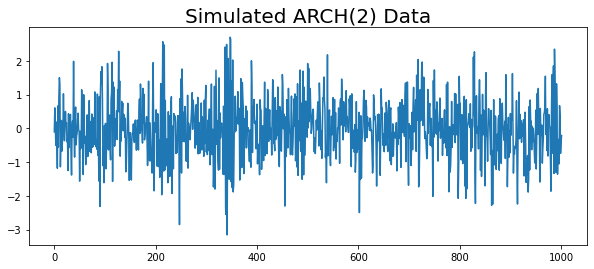

In [251]:
plt.figure(figsize=(10,4))
plt.plot(series)
plt.title('Simulated ARCH(2) Data', fontsize=20)

Text(0.5, 1.0, 'Data Volatility')

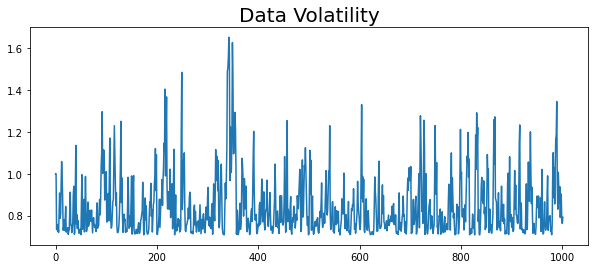

In [252]:
plt.figure(figsize=(10,4))
plt.plot(vols)
plt.title('Data Volatility', fontsize=20)

Text(0.5, 1.0, 'Data and Volatility')

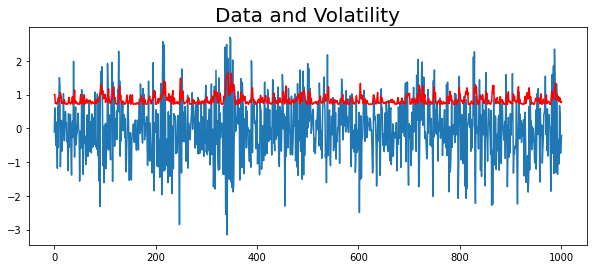

In [253]:
plt.figure(figsize=(10,4))
plt.plot(series)
plt.plot(vols, color='red')
plt.title('Data and Volatility', fontsize=20)

## PACF Plot

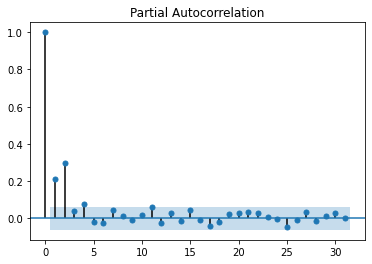

In [254]:
plot_pacf(np.array(series)**2)
plt.show()

## Fit the ARCH Model

In [255]:
train, test = series[:-test_size], series[-test_size:]

In [256]:
model = arch_model(train, p=2, q=0)

In [257]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1143.6962902487976
Iteration:      2,   Func. Count:     16,   Neg. LLF: 1121.5874177981577
Iteration:      3,   Func. Count:     25,   Neg. LLF: 1120.0207548253065
Iteration:      4,   Func. Count:     32,   Neg. LLF: 1114.8149124898628
Iteration:      5,   Func. Count:     40,   Neg. LLF: 1114.7641100930698
Iteration:      6,   Func. Count:     47,   Neg. LLF: 1114.1968030180062
Iteration:      7,   Func. Count:     53,   Neg. LLF: 1113.7402152687862
Iteration:      8,   Func. Count:     59,   Neg. LLF: 1113.7147655747026
Iteration:      9,   Func. Count:     65,   Neg. LLF: 1113.7021063823734
Iteration:     10,   Func. Count:     71,   Neg. LLF: 1113.7013524076392
Iteration:     11,   Func. Count:     77,   Neg. LLF: 1113.701334541217
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1113.7013345412734
            Iterations: 11
            Function evaluations: 77
            Gradient eva

In [258]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -1113.70
Distribution:                  Normal   AIC:                           2235.40
Method:            Maximum Likelihood   BIC:                           2254.62
                                        No. Observations:                  902
Date:                Mon, Mar 15 2021   Df Residuals:                      901
Time:                        12:02:42   Df Model:                            1
                                  Mean Model                                  
==============================================================================
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         -8.7848e-03  2.494e-02     -0.352      0.725 [-5.766e-02,4.009e-02]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.4747  4.068e-02     11.671  1.791e-31   [  0.395,  0.554]
alpha[1]       0.0820  3.366e-02      2.436  1.483e-02 [1.604e-02,  0.148]
alpha[2]       0.2753  4.849e-02      5.678  1.364e-08   [  0.180,  0.370]
==========================================================================

Covariance estimator: robust
"""

## Predict

In [259]:
predictions = model_fit.forecast(horizon=test_size)

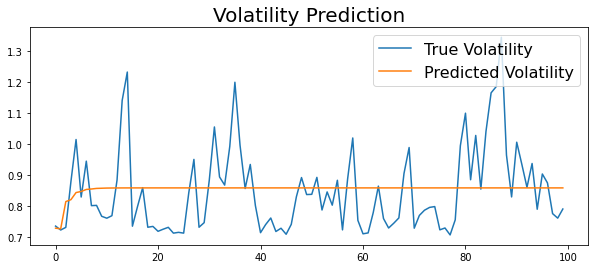

In [260]:
plt.figure(figsize=(10,4))
true, = plt.plot(vols[-test_size:])
preds, = plt.plot(np.sqrt(predictions.variance.values[-1, :]))
plt.title('Volatility Prediction', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)

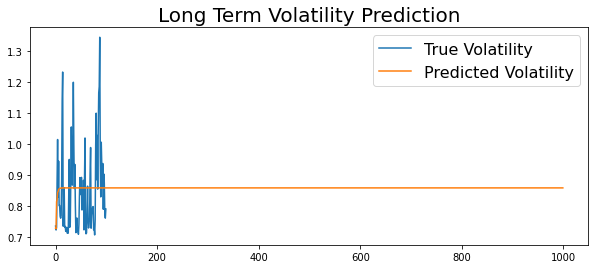

In [261]:
predictions_long_term = model_fit.forecast(horizon=1000)
plt.figure(figsize=(10,4))
true, = plt.plot(vols[-test_size:])
preds, = plt.plot(np.sqrt(predictions_long_term.variance.values[-1, :]))
plt.title('Long Term Volatility Prediction', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)

## Rolling Forecast Origin

In [262]:
rolling_predictions = []
for i in range(test_size):
    train = series[:-(test_size-i)]
    model = arch_model(train, p=2, q=0)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

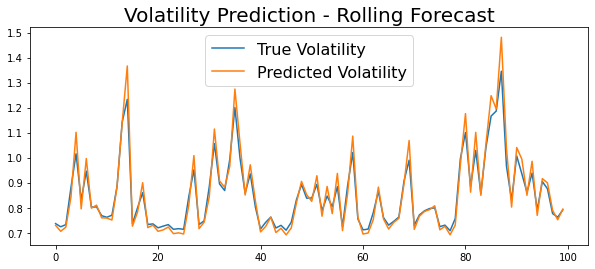

In [263]:
plt.figure(figsize=(10,4))
true, = plt.plot(vols[-test_size:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)

# GARCH(1,1) Model

$$
a_t = \varepsilon_t \sqrt{\omega + \alpha_1 a_{t-1}^2 + \beta_1 \sigma_{t-1}^2}
$$

$$
a_0 \sim \mathcal{N}(0,1)
$$

$$
\sigma_0 =1
$$

$$
\varepsilon_t \sim \mathcal{N}(0,1)
$$

In [264]:
# create dataset
n = 500
omega = 0.6

alpha_1 = 0.34

beta_1 = 0.2

test_size = int(n*0.2)

series = [gauss(0,1)]
vols = [1]

for _ in range(n):
    new_vol = np.sqrt(omega + alpha_1*series[-1]**2 + beta_1*vols[-1]**2)
    new_val = gauss(0,1) * new_vol
    
    vols.append(new_vol)
    series.append(new_val)

Text(0.5, 1.0, 'Simulated GARCH(1,1) Data')

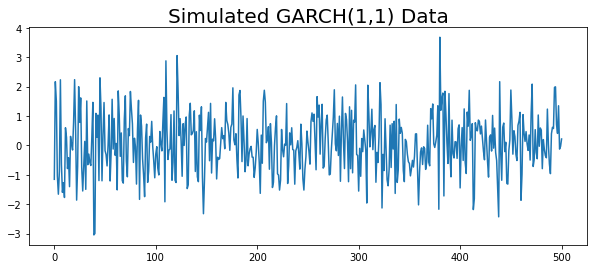

In [265]:
plt.figure(figsize=(10,4))
plt.plot(series)
plt.title('Simulated GARCH(1,1) Data', fontsize=20)

Text(0.5, 1.0, 'Data Volatility')

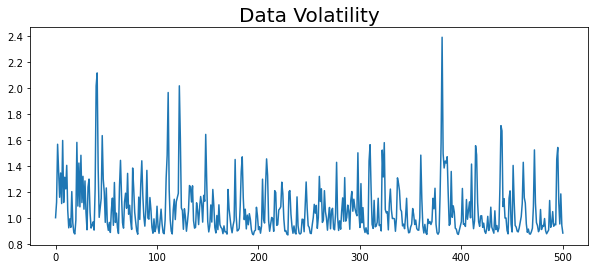

In [266]:
plt.figure(figsize=(10,4))
plt.plot(vols)
plt.title('Data Volatility', fontsize=20)

Text(0.5, 1.0, 'Data and Volatility')

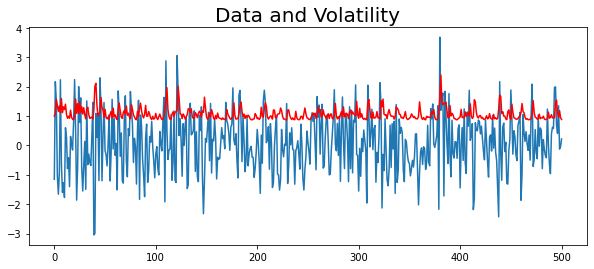

In [267]:
plt.figure(figsize=(10,4))
plt.plot(series)
plt.plot(vols, color='red')
plt.title('Data and Volatility', fontsize=20)

## PACF Plot

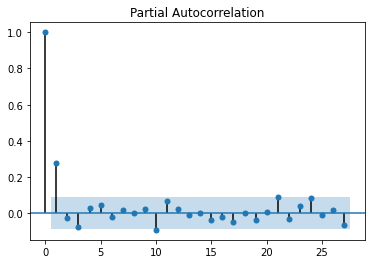

In [268]:
plot_pacf(np.array(series)**2)
plt.show()

## Fit the GARCH Model

In [269]:
train, test = series[:-test_size], series[-test_size:]

In [270]:
model = arch_model(train, p=1, q=1)

In [271]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 568.698758226252
Iteration:      2,   Func. Count:     15,   Neg. LLF: 568.6067452195156
Iteration:      3,   Func. Count:     22,   Neg. LLF: 567.8432348217518
Iteration:      4,   Func. Count:     30,   Neg. LLF: 567.8137739875258
Iteration:      5,   Func. Count:     36,   Neg. LLF: 566.3965739607518
Iteration:      6,   Func. Count:     42,   Neg. LLF: 566.3864816060416
Iteration:      7,   Func. Count:     48,   Neg. LLF: 566.3691577455256
Iteration:      8,   Func. Count:     54,   Neg. LLF: 566.36831442917
Iteration:      9,   Func. Count:     60,   Neg. LLF: 566.3681771097895
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 566.368177109829
            Iterations: 9
            Function evaluations: 60
            Gradient evaluations: 9


In [272]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -566.368
Distribution:                  Normal   AIC:                           1140.74
Method:            Maximum Likelihood   BIC:                           1156.71
                                        No. Observations:                  401
Date:                Mon, Mar 15 2021   Df Residuals:                      400
Time:                        12:02:46   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0339  4.723e-02      0.718      0.473 [-5.864e-02,  0.126]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.6690      0.102      6.533  6.432e-11 [  0.468,  0.870]
alpha[1]       0.3538  9.048e-02      3.910  9.226e-05 [  0.176,  0.531]
beta[1]        0.0248  8.273e-02      0.300      0.764 [ -0.137,  0.187]
========================================================================

Covariance estimator: robust
"""

## Predict

In [273]:
predictions = model_fit.forecast(horizon=test_size)

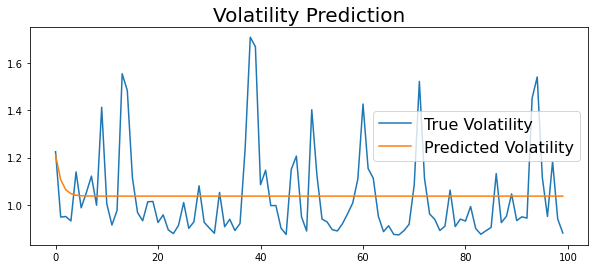

In [274]:
plt.figure(figsize=(10,4))
true, = plt.plot(vols[-test_size:])
preds, = plt.plot(np.sqrt(predictions.variance.values[-1, :]))
plt.title('Volatility Prediction', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)

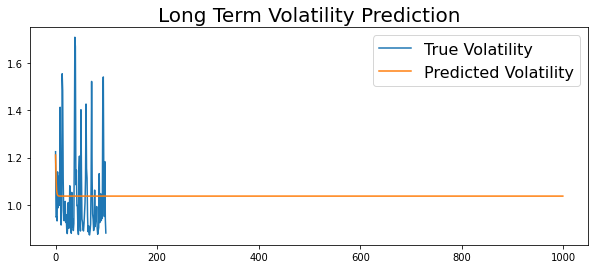

In [275]:
predictions_long_term = model_fit.forecast(horizon=1000)
plt.figure(figsize=(10,4))
true, = plt.plot(vols[-test_size:])
preds, = plt.plot(np.sqrt(predictions_long_term.variance.values[-1, :]))
plt.title('Long Term Volatility Prediction', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)

## Rolling Forecast Origin

In [276]:
rolling_predictions = []
for i in range(test_size):
    train = series[:-(test_size-i)]
    model = arch_model(train, p=1, q=1)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

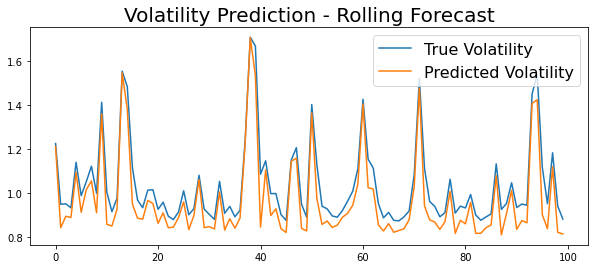

In [277]:
plt.figure(figsize=(10,4))
true, = plt.plot(vols[-test_size:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)

# GARCH(2,2) Model

$$
a_t = \varepsilon_t \sqrt{\omega + \alpha_1 a_{t-1}^2 + \alpha_2 a_{t-2}^2 + \beta_1 \sigma_{t-1}^2 + \beta_2 \sigma_{t-2}^2}
$$

$$
a_0, a_1 \sim \mathcal{N}(0,1)
$$

$$
\sigma_0 =1, \sigma_1 = 1
$$

$$
\varepsilon_t \sim \mathcal{N}(0,1)
$$

In [278]:
# create dataset
n = 1000
omega = 0.6

alpha_1 = 0.14
alpha_2 = 0.32

beta_1 = 0.2
beta_2 = 0.4

test_size = int(n*0.1)

series = [gauss(0,1), gauss(0,1)]
vols = [1, 1]

for _ in range(n):
    new_vol = np.sqrt(omega + alpha_1*series[-1]**2 + alpha_2*series[-2]**2 + beta_1*vols[-1]**2 + beta_2*vols[-2]**2)
    new_val = gauss(0,1) * new_vol
    
    vols.append(new_vol)
    series.append(new_val)

Text(0.5, 1.0, 'Simulated GARCH(2,2) Data')

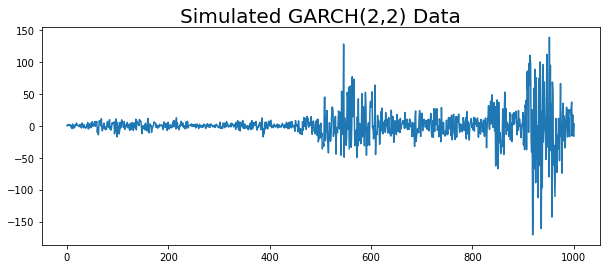

In [279]:
plt.figure(figsize=(10,4))
plt.plot(series)
plt.title('Simulated GARCH(2,2) Data', fontsize=20)

Text(0.5, 1.0, 'Data Volatility')

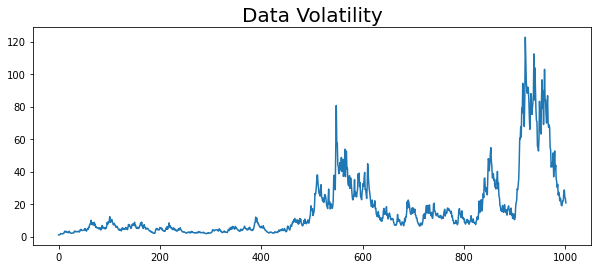

In [280]:
plt.figure(figsize=(10,4))
plt.plot(vols)
plt.title('Data Volatility', fontsize=20)

Text(0.5, 1.0, 'Data and Volatility')

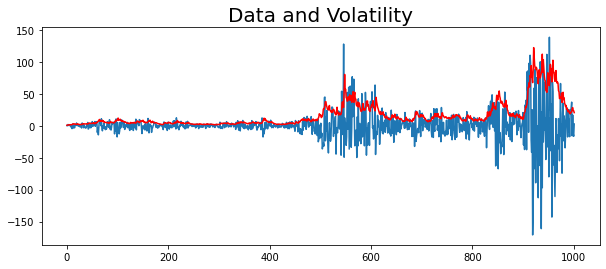

In [281]:
plt.figure(figsize=(10,4))
plt.plot(series)
plt.plot(vols, color='red')
plt.title('Data and Volatility', fontsize=20)

## PACF Plot

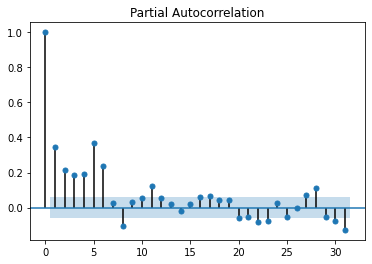

In [282]:
plot_pacf(np.array(series)**2)
plt.show()

## Fit the GARCH Model

In [283]:
train, test = series[:-test_size], series[-test_size:]

In [284]:
model = arch_model(train, p=2, q=2)

In [285]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 3236.3189347673137
Iteration:      2,   Func. Count:     18,   Neg. LLF: 3225.4923229275855
Iteration:      3,   Func. Count:     27,   Neg. LLF: 3206.6774961530423
Iteration:      4,   Func. Count:     36,   Neg. LLF: 3193.52362702585
Iteration:      5,   Func. Count:     45,   Neg. LLF: 3189.4253242164787
Iteration:      6,   Func. Count:     54,   Neg. LLF: 3181.9050491017683
Iteration:      7,   Func. Count:     62,   Neg. LLF: 3177.006984783594
Iteration:      8,   Func. Count:     71,   Neg. LLF: 3169.345670662002
Iteration:      9,   Func. Count:     81,   Neg. LLF: 3169.197889876482
Iteration:     10,   Func. Count:     89,   Neg. LLF: 3168.686822649557
Iteration:     11,   Func. Count:     97,   Neg. LLF: 3168.3848498873012
Iteration:     12,   Func. Count:    105,   Neg. LLF: 3168.3272466992294
Iteration:     13,   Func. Count:    113,   Neg. LLF: 3168.3189596481043
Iteration:     14,   Func. Count:    121,   Neg. LLF: 316

In [286]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -3168.32
Distribution:                  Normal   AIC:                           6348.64
Method:            Maximum Likelihood   BIC:                           6377.46
                                        No. Observations:                  902
Date:                Mon, Mar 15 2021   Df Residuals:                      901
Time:                        12:02:50   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.2302      0.500      0.461      0.645 [ -0.749,  1.210]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.7291      0.925      0.788      0.430 [ -1.083,  2.541]
alpha[1]       0.1095      0.374      0.293      0.770 [ -0.623,  0.842]
alpha[2]       0.2269      0.340      0.668      0.504 [ -0.439,  0.893]
beta[1]    8.1040e-12      2.000  4.051e-12      1.000 [ -3.921,  3.921]
beta[2]        0.6635      1.977      0.336      0.737 [ -3.211,  4.538]
========================================================================

Covariance estimator: robust
"""

## Predict

In [287]:
predictions = model_fit.forecast(horizon=test_size)

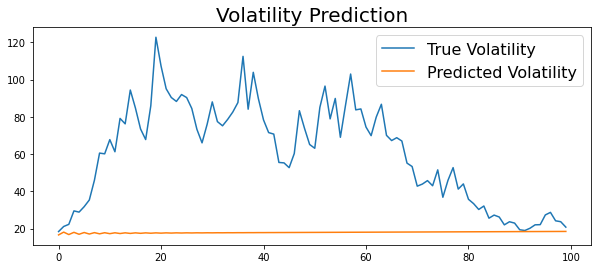

In [288]:
plt.figure(figsize=(10,4))
true, = plt.plot(vols[-test_size:])
preds, = plt.plot(np.sqrt(predictions.variance.values[-1, :]))
plt.title('Volatility Prediction', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)

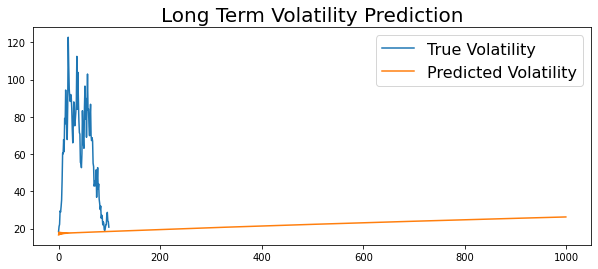

In [289]:
predictions_long_term = model_fit.forecast(horizon=1000)
plt.figure(figsize=(10,4))
true, = plt.plot(vols[-test_size:])
preds, = plt.plot(np.sqrt(predictions_long_term.variance.values[-1, :]))
plt.title('Long Term Volatility Prediction', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)

## Rolling Forecast Origin

In [290]:
rolling_predictions = []
for i in range(test_size):
    train = series[:-(test_size-i)]
    model = arch_model(train, p=2, q=2)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

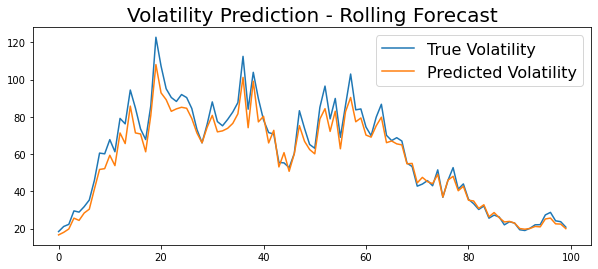

In [291]:
plt.figure(figsize=(10,4))
true, = plt.plot(vols[-test_size:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)

# GARCH(3,3) Model

$$
a_t = \varepsilon_t \sqrt{\omega + \alpha_1 a_{t-1}^2 + \alpha_2 a_{t-2}^2 + \alpha_3 a_{t-3}^2 + \beta_1 \sigma_{t-1}^2 + \beta_2 \sigma_{t-2}^2 + \beta_3 \sigma_{t-3}^2}
$$

$$
a_0, a_1, a_2 \sim \mathcal{N}(0,1)
$$

$$
\sigma_0 =1, \sigma_1 = 1, \sigma_2 = 1
$$

$$
\varepsilon_t \sim \mathcal{N}(0,1)
$$

In [345]:
# create dataset
n = 1000

omega = 0.5

alpha_1 = 0.15
alpha_2 = 0.05
alpha_3 = 0.12

beta_1 = 0.05
beta_2 = 0.06
beta_3 = 0.29

test_size = int(n*0.1)

series = [gauss(0,1), gauss(0,1), gauss(0,1)]
vols = [1, 1, 1]

for _ in range(n):
    new_vol = np.sqrt(omega + alpha_1*series[-1]**2 + alpha_2*series[-2]**2 + alpha_3*series[-3]**2 + beta_1*vols[-1]**2 + beta_2*vols[-2]**2 + beta_3*vols[-3]**2)
    new_val = gauss(0,1) * new_vol
    
    vols.append(new_vol)
    series.append(new_val)

Text(0.5, 1.0, 'Simulated GARCH(2,2) Data')

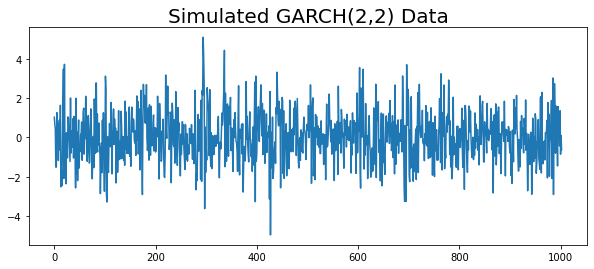

In [346]:
plt.figure(figsize=(10,4))
plt.plot(series)
plt.title('Simulated GARCH(2,2) Data', fontsize=20)

Text(0.5, 1.0, 'Data Volatility')

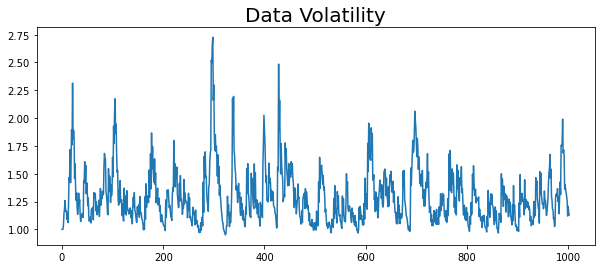

In [347]:
plt.figure(figsize=(10,4))
plt.plot(vols)
plt.title('Data Volatility', fontsize=20)

Text(0.5, 1.0, 'Data and Volatility')

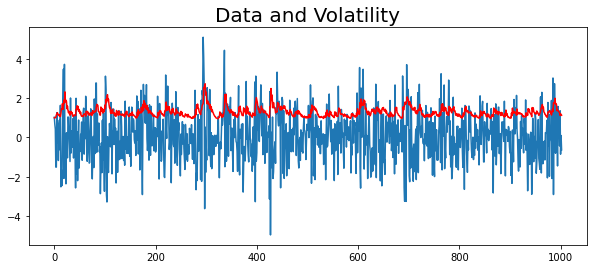

In [348]:
plt.figure(figsize=(10,4))
plt.plot(series)
plt.plot(vols, color='red')
plt.title('Data and Volatility', fontsize=20)

## PACF Plot

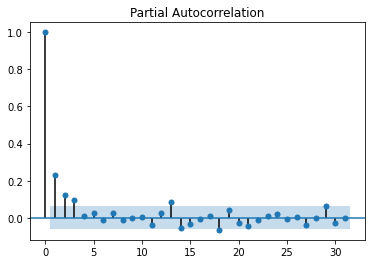

In [349]:
plot_pacf(np.array(series)**2)
plt.show()

## Fit the GARCH Model

In [350]:
train, test = series[:-test_size], series[-test_size:]

In [351]:
model = arch_model(train, p=3, q=3)

In [352]:
model_fit = model.fit()

Iteration:      1,   Func. Count:     10,   Neg. LLF: 1483.2967542075858
Iteration:      2,   Func. Count:     23,   Neg. LLF: 1483.0368388856016
Iteration:      3,   Func. Count:     34,   Neg. LLF: 1480.4335911292333
Iteration:      4,   Func. Count:     47,   Neg. LLF: 1480.3798262549044
Iteration:      5,   Func. Count:     58,   Neg. LLF: 1479.7212830503936
Iteration:      6,   Func. Count:     70,   Neg. LLF: 1479.6506941155035
Iteration:      7,   Func. Count:     81,   Neg. LLF: 1479.6047044345942
Iteration:      8,   Func. Count:     92,   Neg. LLF: 1479.520097070712
Iteration:      9,   Func. Count:    103,   Neg. LLF: 1479.489335548779
Iteration:     10,   Func. Count:    113,   Neg. LLF: 1479.3440495749455
Iteration:     11,   Func. Count:    123,   Neg. LLF: 1479.3312070731145
Iteration:     12,   Func. Count:    133,   Neg. LLF: 1479.32708566659
Iteration:     13,   Func. Count:    143,   Neg. LLF: 1479.3237006236948
Iteration:     14,   Func. Count:    153,   Neg. LLF: 1

In [353]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1479.32
Distribution:                  Normal   AIC:                           2974.65
Method:            Maximum Likelihood   BIC:                           3013.09
                                        No. Observations:                  903
Date:                Mon, Mar 15 2021   Df Residuals:                      902
Time:                        12:22:09   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0297  3.941e-02      0.753      0.452 [-4.758e-02,  0.107]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.6319      0.558      1.132      0.258   [ -0.462,  1.726]
alpha[1]       0.1737  5.393e-02      3.220  1.283e-03 [6.795e-02,  0.279]
alpha[2]       0.0742      0.163      0.454      0.650   [ -0.246,  0.394]
alpha[3]       0.0374      0.128      0.291      0.771   [ -0.214,  0.289]
beta[1]    6.5693e-14      0.802  8.189e-14      1.000   [ -1.572,  1.572]
beta[2]        0.3293      0.303      1.086      0.278   [ -0.265,  0.924]
beta[3]    1.0306e-13      0.388  2.659e-13      1.000   [ -0.760,  0.760]
==========================================================================

Covariance estimator: robust
"""

## Predict

In [354]:
predictions = model_fit.forecast(horizon=test_size)

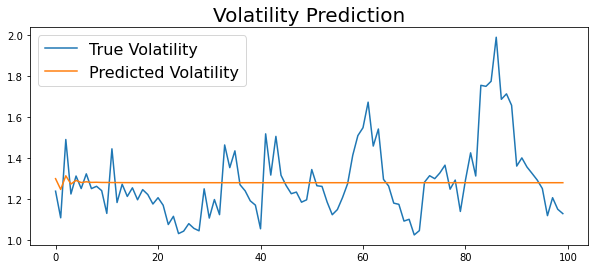

In [355]:
plt.figure(figsize=(10,4))
true, = plt.plot(vols[-test_size:])
preds, = plt.plot(np.sqrt(predictions.variance.values[-1, :]))
plt.title('Volatility Prediction', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)

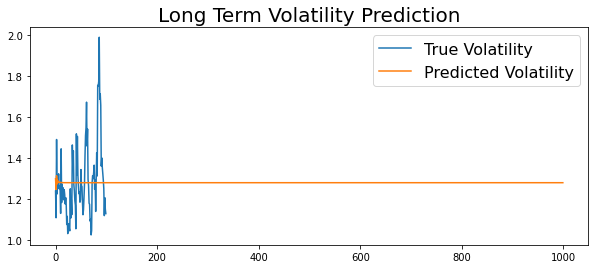

In [356]:
predictions_long_term = model_fit.forecast(horizon=1000)
plt.figure(figsize=(10,4))
true, = plt.plot(vols[-test_size:])
preds, = plt.plot(np.sqrt(predictions_long_term.variance.values[-1, :]))
plt.title('Long Term Volatility Prediction', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)

## Rolling Forecast Origin

In [357]:
rolling_predictions = []
for i in range(test_size):
    train = series[:-(test_size-i)]
    model = arch_model(train, p=3, q=3)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

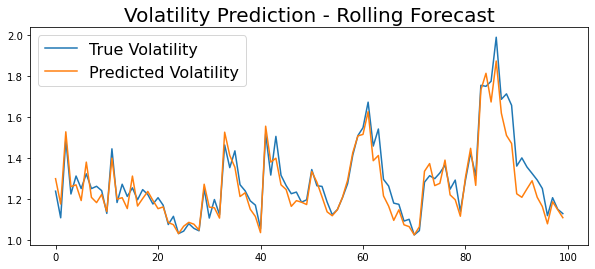

In [358]:
plt.figure(figsize=(10,4))
true, = plt.plot(vols[-test_size:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)